<h1><center> UFU - Universidade Federal de Uberlândia</center></h1>

<h2><center>Graduação em Engenharia Civil</center></h2>

<h3><center>INICIAÇÃO CIENTÍFICA</center><br>
TÍTULO: DESENVOLVIMENTO DE MODELOS DE PREVISÃO DE CHUVAS USANDO
APRENDIZADO DE MÁQUINA <br>
<br>
ALUNO: Pedro Augusto Toledo Rios</h3>

<p>Este notebook é referente à Iniciação Ciêntífica na área de Ciência da Computação/Ánalise de Dados .</p>

# Classificação 

## Importações e Configurações Iniciais

In [42]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sn

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import  metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

# Análise Exploratória dos Dados

In [43]:
#Tratamento de dados
missing_values = ['n/a','na','*****','*','*******',' -', '******', '5..84', '3..66', '3.3.21', '1..41', '********', '3.7.94', '354.59*', '564..79', '5.04.24', '21:36','**********', '***', '*********', '03:18', '00:00', '03:48', '08:42', '03:06', '09:06', '01:30', '07:48', '09:12', '10:18', '01:24', '#VALUE!' , '926,4923,8', '27/07/1902**21:36:00', '-', '926.4923.8','185.488.992','4.535.416.667','3.495.833.333','2.015.833.333','2.489.166.667','4.745.416.667','3.227.916.667','3.594.166.667','3.720.416.667']

dados_clima = pd.read_csv("C:/Users/riospedro/OneDrive - Universidade Federal de Uberlândia/Área de Trabalho/python 05-11/Titanic/modelo global/dadosclima_ajustado.csv", header = None, sep=';', na_values=missing_values)
dados_clima.columns=['Max Temperature (°C)', 'Min Temperature (°C)', 'Average temperature (°C)', 'Wind Speed (m/s)', 'Solar Radiation (cal/cm²/h)', 'Pressure (mb)', 'Relative humidity (%)', 'Daily rain (mm)', 'Month', 'Year']
dados_clima['Pressure (mb)'] = dados_clima['Pressure (mb)'].str.replace(',,', '')
dados_clima['Relative humidity (%)'] = dados_clima['Relative humidity (%)'].astype(float)
dados_clima['Pressure (mb)'] = dados_clima['Pressure (mb)'].astype(float)
dados_clima['Year'] = dados_clima['Year'].str.replace(',,', '')
dados_clima['Year'] = dados_clima['Year'].astype(int)
dados_clima['Wind Speed (m/s)'] = dados_clima['Wind Speed (m/s)'].astype(float)
dados_clima['Wind Speed (m/s)'] = dados_clima['Wind Speed (m/s)']/3.6 #transformando para m/s
dados_clima['Solar Radiation (cal/cm²/h)'] = dados_clima['Solar Radiation (cal/cm²/h)'].astype(float)

#dados_clima['Daily rain (mm)'] = dados_clima['Daily rain (mm)'].astype(float) #Transformação do tipo de variável 
combine = [dados_clima]
chuva = dados_clima['Daily rain (mm)']

#Primeiras cinco linhas dos dados pós-tratados
dados_clima.head()
dados_clima.dropna()



,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (m/s),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Daily rain (mm),Month,Year
0,26.8,14.0,20.4,0.941667,340.16,926.1,88.5,23.6,1,1983
1,27.2,13.0,20.1,0.838889,340.16,927.6,86.6,20.4,1,1983
2,27.4,17.2,22.3,1.658333,370.18,930.0,87.2,21.2,1,1983
3,28.2,17.0,22.6,1.180556,420.20,931.3,8.0,0.0,1,1983
4,29.0,18.2,23.6,0.902778,160.08,931.4,91.8,40.0,1,1983
...,...,...,...,...,...,...,...,...,...,...
13416,16.9,13.0,15.0,0.861111,80.06,926.1,92.0,7.9,9,2019
13417,20.8,12.2,16.5,1.416667,230.67,927.1,84.8,0.0,9,2019
13418,24.8,11.8,18.3,1.086111,273.22,928.4,76.8,0.0,9,2019
13419,26.2,3.9,15.1,1.950000,286.66,925.0,53.0,0.0,9,2019


### Informações de cada coluna do dataframe

In [44]:
dados_clima.describe()


,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (m/s),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Daily rain (mm),Month,Year
count,13297.000000,13299.000000,13311.000000,12882.000000,1.294500e+04,13021.000000,11681.000000,13406.000000,13421.000000,13421.000000
mean,27.886343,14.175675,21.049129,0.893429,4.716028e+06,934.185017,71.213168,3.906196,6.491916,2000.876909
std,3.788595,4.073522,3.482316,0.755234,6.149754e+07,205.277687,15.780946,9.869687,3.439691,10.608740
min,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1983.000000
25%,25.800000,11.400000,18.900000,0.425000,2.871500e+02,929.000000,63.500000,0.000000,4.000000,1992.000000
50%,28.200000,14.900000,21.500000,0.700000,3.649800e+02,933.400000,73.300000,0.000000,7.000000,2001.000000
75%,30.600000,17.400000,23.700000,1.136111,4.602200e+02,937.400000,82.000000,1.600000,9.000000,2010.000000
max,39.200000,28.600000,34.200000,27.555556,4.869536e+09,9925.800000,100.000000,82.400000,12.000000,2019.000000


### Criação de uma nova classe que determina se naquele dia choveu ou não

In [47]:
#dados_clima['Choveu?']= chuva

# Loop que preenche a nova coluna com 0(não choveu) e 1(choveu)
for dados_clima in combine:    
    dados_clima.loc[ dados_clima['Daily rain (mm)'] == 0, 'Choveu?'] = 0
    dados_clima.loc[(dados_clima['Daily rain (mm)'] > 0), 'Choveu?'] = 1

#Visualização das primeiras cinco linhas da tabela
dados_clima.head()   
    

,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (m/s),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Daily rain (mm),Month,Year,Choveu?
0,26.8,14.0,20.4,0.941667,340.16,926.1,88.5,23.6,1,1983,1.0
1,27.2,13.0,20.1,0.838889,340.16,927.6,86.6,20.4,1,1983,1.0
2,27.4,17.2,22.3,1.658333,370.18,930.0,87.2,21.2,1,1983,1.0
3,28.2,17.0,22.6,1.180556,420.20,931.3,8.0,0.0,1,1983,0.0
4,29.0,18.2,23.6,0.902778,160.08,931.4,91.8,40.0,1,1983,1.0


In [48]:
#Tratar os Missing Values (Valores Ausentes)

dados_clima['Min Temperature (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Average temperature (°C)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Wind Speed (m/s)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última velocidade antes do Missing Value
dados_clima['Solar Radiation (cal/cm²/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última radiação antes do Missing Value
dados_clima['Relative humidity (%)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última taxa UR antes do Missing Value
dados_clima['Daily rain (mm)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última quantidade antes do Missing Value
dados_clima['Pressure (mb)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Choveu?'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Max Temperature (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Choveu?'] = dados_clima['Choveu?'].astype(int)


#verificar os missing values após a imputação acima
print('\nMissing Values no dataframe  após o tratamento:\n',dados_clima.isnull().sum(), sep="")


Missing Values no dataframe  após o tratamento:
Max Temperature (°C)           0
Min Temperature (°C)           0
Average temperature (°C)       0
Wind Speed (m/s)               0
Solar Radiation (cal/cm²/h)    0
Pressure (mb)                  0
Relative humidity (%)          0
Daily rain (mm)                0
Month                          0
Year                           0
Choveu?                        0
dtype: int64


C:\Users\riospedro\AppData\Local\Temp\ipykernel_14308\2371231040.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_clima['Min Temperature (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
C:\Users\riospedro\AppData\Local\Temp\ipykernel_14308\2371231040.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_clima['Average temperature (°C)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última temperatura antes do Missing Value
C:\Users\riospedro\AppData\Local\Temp\ipykernel_14308\2371231040.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_clima['Wind Speed (m/s)'].fillna(method='ffill',inplace = True) #ffill => preencher co

In [49]:
dados_clima.info

<bound method DataFrame.info of        Max Temperature (°C)  Min Temperature (°C)  Average temperature (°C)  \
0                      26.8                  14.0                      20.4   
1                      27.2                  13.0                      20.1   
2                      27.4                  17.2                      22.3   
3                      28.2                  17.0                      22.6   
4                      29.0                  18.2                      23.6   
...                     ...                   ...                       ...   
13416                  16.9                  13.0                      15.0   
13417                  20.8                  12.2                      16.5   
13418                  24.8                  11.8                      18.3   
13419                  26.2                   3.9                      15.1   
13420                  20.0                   3.9                      12.0   

       Wind Speed (

In [50]:
# Usamos a correlação de Pearson e ordenamos os valores
columns_corr = dados_clima.corr(method='pearson')['Choveu?'].sort_values()
print(columns_corr)

Max Temperature (°C)          -0.097016
Month                         -0.090073
Year                          -0.023771
Pressure (mb)                  0.006205
Solar Radiation (cal/cm²/h)    0.017993
Wind Speed (m/s)               0.033138
Average temperature (°C)       0.100282
Relative humidity (%)          0.231160
Min Temperature (°C)           0.258872
Daily rain (mm)                0.569443
Choveu?                        1.000000
Name: Choveu?, dtype: float64


### Linhas de código que permitem selecionar só uma parte do dataframe, no caso o período interessado.

In [51]:
# 70% para treino / 30% para teste

data_inicio = 1980
data_fim = 2020
data_inicio_treinamento = 1980
data_fim_treinamento = 2008
data_inicio_teste = 2009
data_fim_teste = 2019

dadosparateste = dados_clima.copy()



In [52]:
dadosparateste.drop(columns = ['Daily rain (mm)'], axis = 1, inplace=True)

#  Modelos de Aprendizado de Máquina (Machine Learning)

## Criação de um dataframe de Treinamento e Teste

In [53]:
#Criar os dataframe de Treinamento e Teste
df_train =  dadosparateste[dadosparateste['Year'] >= data_inicio_treinamento]
df_train =  dadosparateste[dadosparateste['Year'] <= data_fim_treinamento]
df_test = dadosparateste[dadosparateste['Year'] >= data_inicio_teste]
df_test =  dadosparateste[dadosparateste['Year'] <= data_fim_teste]

x_train = df_train.iloc[:,0:9]
y_train = df_train[['Choveu?']]

x = df_test.iloc[:,0:9]
y = df_test[['Choveu?']]

x.head()

,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (m/s),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Month,Year
0,26.8,14.0,20.4,0.941667,340.16,926.1,88.5,1,1983
1,27.2,13.0,20.1,0.838889,340.16,927.6,86.6,1,1983
2,27.4,17.2,22.3,1.658333,370.18,930.0,87.2,1,1983
3,28.2,17.0,22.6,1.180556,420.20,931.3,8.0,1,1983
4,29.0,18.2,23.6,0.902778,160.08,931.4,91.8,1,1983


## Modelo  - XGBoost para determinar se choveu ou não

In [56]:

#Criando objet classeifer XGBoost
XGboost = xgb.XGBClassifier()
 
#Treinando o XGBoost Classifer
modelxgb = XGboost.fit(x, y)

#Testando 

y_pred4 = modelxgb.predict(x_train)




c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

In [57]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

### Score

In [58]:
print('Precision: %.3f' % precision_score(y_train, y_pred4))
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred4))
print('Recall: %.3f' % recall_score(y_train, y_pred4))


Precision: 0.892
Accuracy: 0.909
Recall: 0.826


In [59]:
print(len(y_pred4))

9496


In [60]:
chuvaprevista = []
for z in range(len(y_pred4)):
    #print(y_pred4[z])
    chuvaprevista.append(y_pred4[z])
    
df_train['Previsão']= chuvaprevista
df_train.head()    

C:\Users\riospedro\AppData\Local\Temp\ipykernel_14308\164513570.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Previsão']= chuvaprevista


,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (m/s),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Month,Year,Choveu?,Previsão
0,26.8,14.0,20.4,0.941667,340.16,926.1,88.5,1,1983,1,1
1,27.2,13.0,20.1,0.838889,340.16,927.6,86.6,1,1983,1,1
2,27.4,17.2,22.3,1.658333,370.18,930.0,87.2,1,1983,1,1
3,28.2,17.0,22.6,1.180556,420.20,931.3,8.0,1,1983,0,0
4,29.0,18.2,23.6,0.902778,160.08,931.4,91.8,1,1983,1,1


NameError: name 'pyplot' is not defined

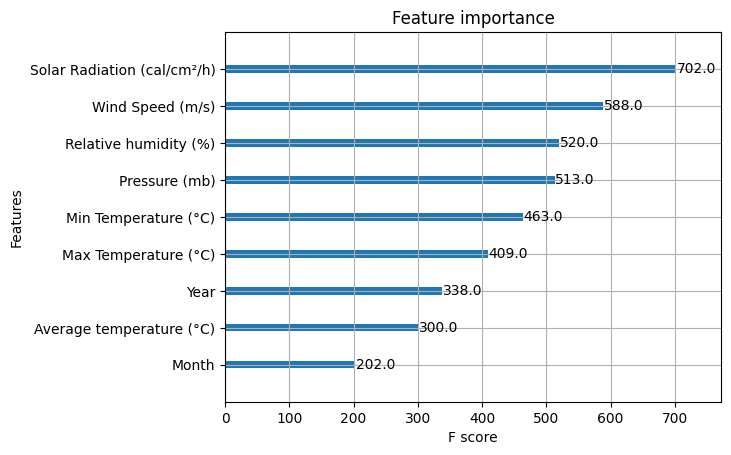

In [ ]:
from xgboost import plot_importance
plot_importance(modelxgb)
pyplot.show()

# Matrizes de Confusão

## Modelo  - XGBoost

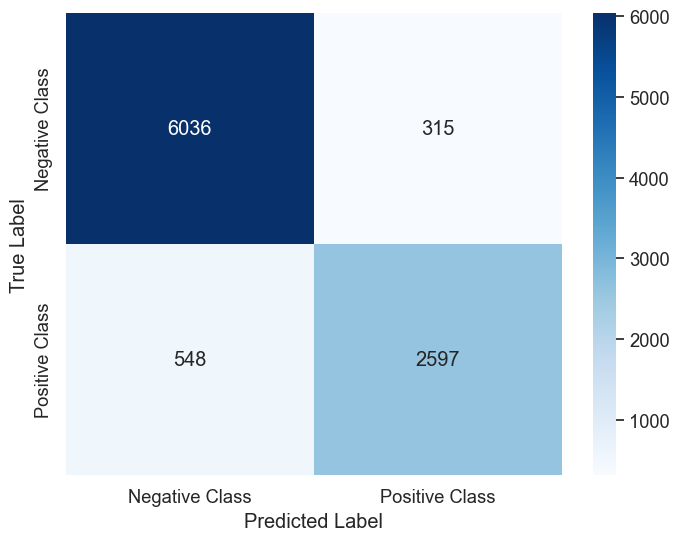

In [62]:
cm = confusion_matrix(y_train, y_pred4)

# Definir rótulos das classes (substitua pelos seus próprios rótulos, se necessário)
class_names = ['Negative Class', 'Positive Class']

# Plotar a matriz de confusão usando Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuste o tamanho da fonte

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()